In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('HR_DS.csv')

In [16]:
# Convert 'Attrition' column to binary
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [18]:
# Label encode categorical columns
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

In [19]:
# Split data into features and target
features = data.drop(['Attrition', 'Over18', 'StandardHours'], axis=1)
target = data['Attrition'].values

In [20]:
# Display target distribution
print(Counter(target))

Counter({0: 1233, 1: 237})


In [22]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=99)
features_over, target_over = oversampler.fit_resample(features, target)
print(Counter(target_over))

Counter({1: 1233, 0: 1233})


In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_over, target_over, 
                                                    test_size=0.2, random_state=99)


<h1> LogisticRegression

In [24]:
# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions
predictions = logistic_model.predict(X_test)

In [26]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.6255060728744939


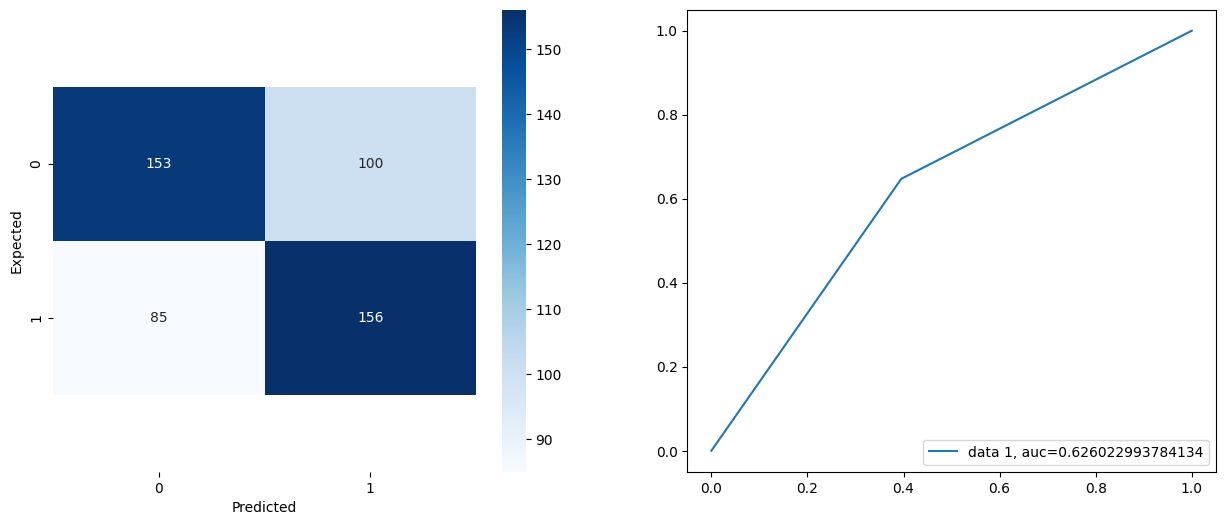

In [28]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions)
auc_value = roc_auc_score(y_test, predictions)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

<h1> RandomForestClassifier

In [30]:
# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=99)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [31]:
# Make predictions
predictions = rf_model.predict(X_test)

In [32]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.97165991902834


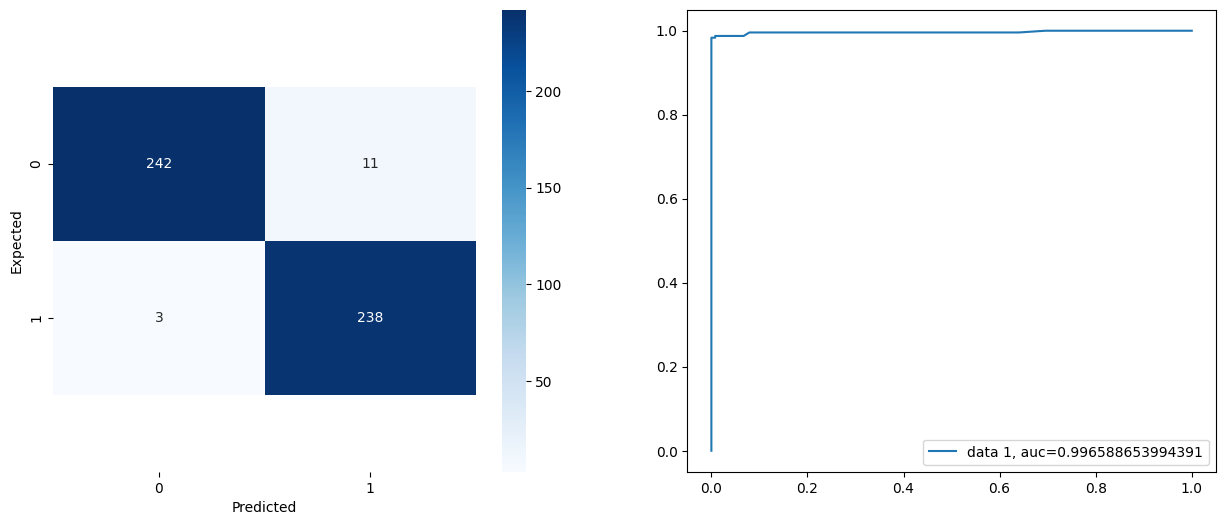

In [33]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

<h1> DecisionTree

In [35]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [36]:
# Make predictions
predictions = dt_model.predict(X_test)

In [37]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.9190283400809717


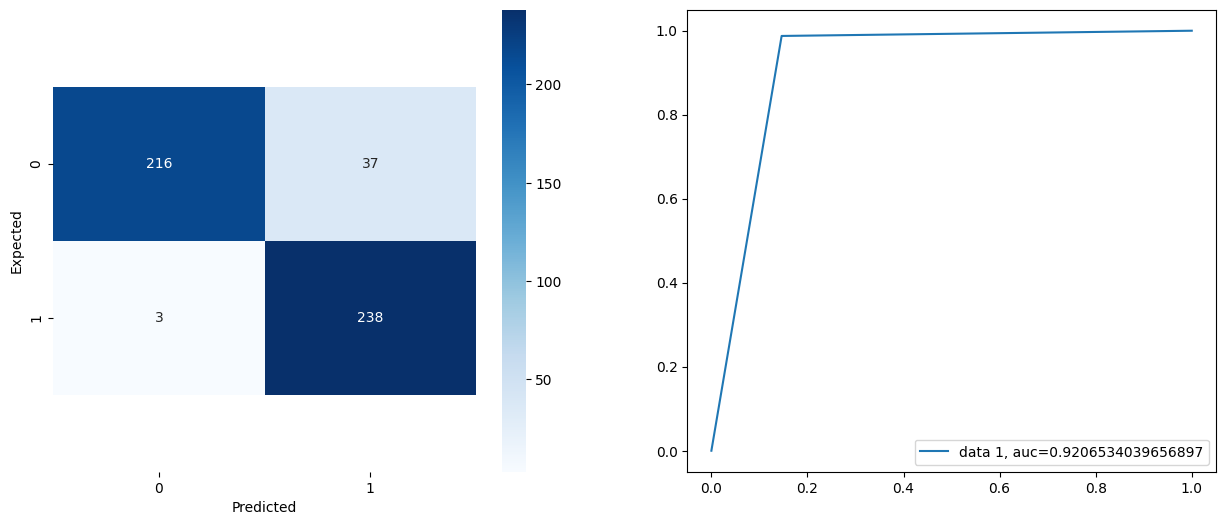

In [39]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

In [40]:
# Make predictions on the test set
test_predictions = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.9190283400809717


In [41]:
# Make predictions on the training set
train_predictions = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print('Train Accuracy:', train_accuracy)

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:  # You can adjust this threshold as needed
    print("The model might be overfitting.")
else:
    print("The model seems fine.")

Train Accuracy: 1.0
The model might be overfitting.


<h1> Model Comparison

In [54]:
#Function to preprocess the data
def preprocess_data(data):
    data = data.copy() 
    
    if 'Attrition' in data.columns:
        data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
    
    label_encoders = {}
    categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                           'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

    for col in categorical_columns:
        if col in data.columns:
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])
            label_encoders[col] = encoder
        
    return data

In [55]:
#Function to select the best models
def select_best_models(data, model):
    data = preprocess_data(data) 
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    X = data.drop('Attrition', axis=1)
    y = data['Attrition'].copy()
    score_train, score_val = [], []
    
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(accuracy_score(y_train, predictions_train))  
        score_val.append(accuracy_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train), 3)
    avg_val = round(np.mean(score_val), 3)
    std_train = round(np.std(score_train), 2)
    std_val = round(np.std(score_val), 2)

    return avg_train, std_train, avg_val, std_val

In [56]:
#Function to show the results
def show_results(df, data, *args):
    count = 0
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count += 1
    return df

In [57]:
#Models for comparison
model_LR = LogisticRegression()
model_DT = DecisionTreeClassifier(random_state=99)
model_RF = RandomForestClassifier(random_state=99)

In [63]:
df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['Logistic Regression', 'Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_all, all_data, model_LR, model_DT, model_RF)

Train    Validation
Logistic Regression  0.841+/-0.0  0.838+/-0.01
Decision Tree          1.0+/-0.0  0.778+/-0.03
Random Forest          1.0+/-0.0  0.852+/-0.01

<h1> Hyperparameter tuning

In [64]:
# Preprocess the data
df_comp = preprocess_data(all_data)
X_data = df_comp.drop('Attrition', axis=1)
y_data = df_comp['Attrition']

In [65]:
#Hyperparameter grid for Decision Tree
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
# Grid search for Decision Tree
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=99), param_grid_DT, scoring='accuracy', return_train_score=True, cv=5)
grid_search_DT.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [67]:
#Hyperparameter grid for Random Forest
param_grid_RF = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [68]:
# Grid search for Random Forest
grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=99), param_grid_RF, scoring='accuracy', return_train_score=True, cv=5)
grid_search_RF.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [69]:
# Display best hyperparameters and their corresponding scores for Decision Tree
print("Decision Tree")
print("Best Hyperparameters: ", grid_search_DT.best_params_)
print("Best Score: ", grid_search_DT.best_score_)

Decision Tree
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score:  0.814965986394558


In [70]:
# Display best hyperparameters and their corresponding scores for Random Forest
print("\nRandom Forest")
print("Best Hyperparameters: ", grid_search_RF.best_params_)
print("Best Score: ", grid_search_RF.best_score_)


Random Forest
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8605442176870749


In [90]:
#Models for comparison
final_model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2, min_samples_split=10, random_state=99)
final_model_RF = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2,n_estimators=200, random_state=99)

In [91]:
df_final = pd.DataFrame(columns=['Train', 'Validation'], index=['Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_final, all_data, final_model_DT, final_model_RF)

Train    Validation
Decision Tree  0.839+/-0.0   0.839+/-0.0
Random Forest   0.86+/-0.0  0.846+/-0.01

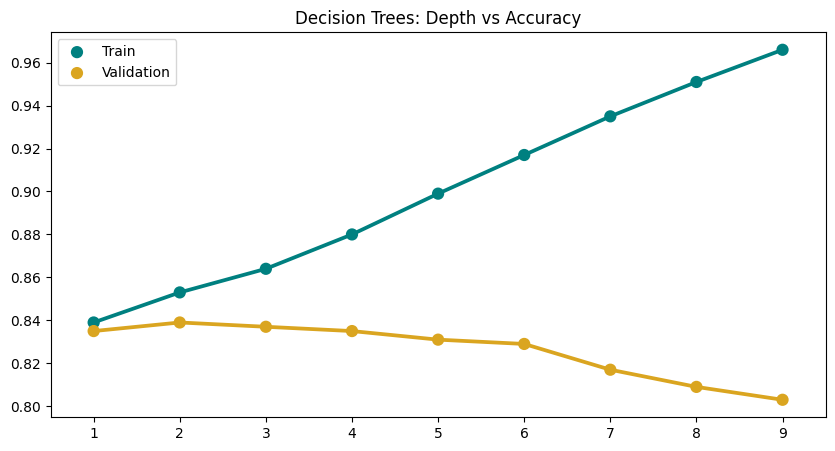

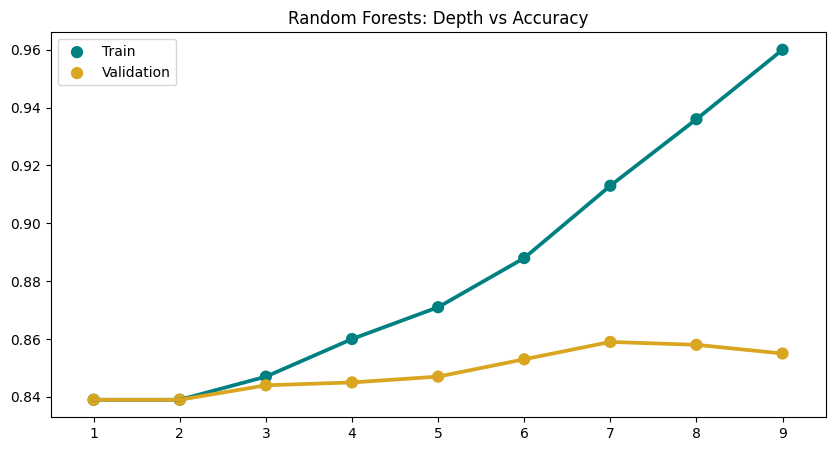

In [87]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color='teal', label='Train')
    sns.pointplot(x=values_try, y=validation, color='goldenrod', label='Validation')
    plt.legend()

def get_models_dt(data, values):
    models = dict()
    results_train, results_val = [], []
    
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth=value, random_state=99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

def get_models_rf(data, values):
    models = dict()
    results_train, results_val = [], []
    
    for value in values:
        models['depth_' + str(value)] = RandomForestClassifier(max_depth=value, random_state=99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

# For Decision Trees
values_try_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_train_dt, results_val_dt = get_models_dt(all_data, values_try_depth)
plt.figure(figsize=(10, 5))
plt.title("Decision Trees: Depth vs Accuracy")
point_plot(results_train_dt, results_val_dt, values_try_depth)

# For Random Forests
values_try_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_train_rf, results_val_rf = get_models_rf(all_data, values_try_depth)
plt.figure(figsize=(10, 5))
plt.title("Random Forests: Depth vs Accuracy")
point_plot(results_train_rf, results_val_rf, values_try_depth)

plt.show()

In [78]:
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Preprocess the data
df_comp = preprocess_data(all_data)
X_data = df_comp.drop('Attrition', axis=1)
y_data = df_comp['Attrition']

# Grid search for Decision Tree
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=99), param_grid_DT, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search_DT.fit(X_data, y_data)

# Display best hyperparameters and their corresponding scores
print("Best Hyperparameters for Decision Tree:", grid_search_DT.best_params_)
print("Best Score for Decision Tree:", grid_search_DT.best_score_)

Fitting 5 folds for each of 8448 candidates, totalling 42240 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; to

In [79]:
#Models for comparison
final_model_DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 14, splitter= 'random')
final_model_RF = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=200, random_state=99)

In [80]:
df_final = pd.DataFrame(columns=['Train', 'Validation'], index=['Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_final, all_data, final_model_DT, final_model_RF)

Train    Validation
Decision Tree  0.843+/-0.01  0.835+/-0.01
Random Forest     1.0+/-0.0  0.854+/-0.01